In [71]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

Below used data is just a dummpy data for simple linear regresssion. The main objective of this notebook is to demonstrate the application of regression evaluation matrics for both train_test_split and cross_val_score

In [14]:
data = pd.read_csv('C:/Users/shree/feature_engineering/datasets/cgpa_salary.csv')
data.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [15]:
data.shape

(200, 2)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


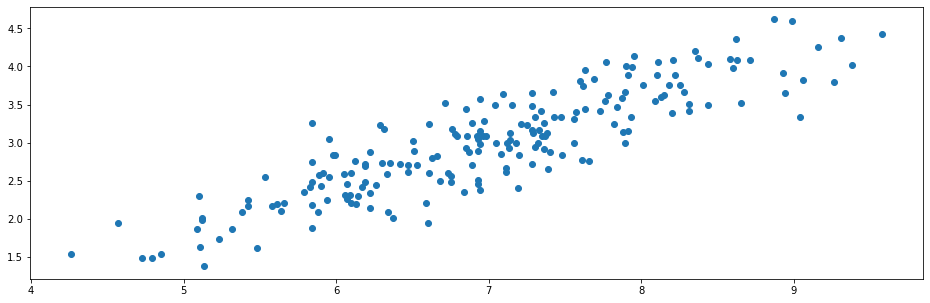

In [50]:
X = data.iloc[:,0:1]
y = data.iloc[:,-1]

print(type(X), type(y))

plt.figure(figsize=(16,5))
plt.scatter(X,y)

In [51]:
lr = LinearRegression()

#using MSE, MAE, RMSE, R2_score, adjusted_r2 in cross_val_score

In [90]:
l = ['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error', 'r2']
cv = KFold(n_splits=5, shuffle=True)

for i in l:
    cvs = cross_val_score(lr, X,y,cv=cv, scoring=i)
    print(f'{i}: {cvs}')
    print()

neg_mean_absolute_error: [-0.25631269 -0.28367481 -0.20690356 -0.28741749 -0.27595059]

neg_mean_squared_error: [-0.11358382 -0.09511846 -0.12239632 -0.10999852 -0.1022914 ]

neg_root_mean_squared_error: [-0.29815152 -0.37859774 -0.31954067 -0.30310904 -0.35441644]

r2: [0.6767476  0.79808655 0.75735071 0.77018864 0.8024926 ]



scoring parameter evaluates the performance and function with the assumption of "greater is better" but as we are calculating error, the lesser the error, we are going in the right direction. That's why all the error calculation done inside scoring are made negative. If we want to evaluate, just removing the minus sign will work.

In [68]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=1, test_size=0.1)
lr.fit(Xtrain, ytrain)
pred_two = lr.predict(Xtest)

In [85]:
mae = mean_absolute_error(ytest,pred_two)
mse = mean_squared_error(ytest,pred_two)
rmse = np.sqrt(mse)
r_two = r2_score(ytest,pred_two)
n = data.shape[0]

print(mae,'\n')
print(mse,'\n')
print(rmse,'\n')
print(r_two,'\n')

0.24073781577396716 

0.096308127551835 

0.3103355080422397 

0.776341122875237 



In [86]:
k = Xtrain.shape[1]
print(n,k)
adjusted_r_two = 1-(((1-r_two)*(1-tnor))/(1-tnor-k))
print(adjusted_r_two)

200 1
0.7774594172608609
